In [1]:
# importando bibliotecas
library('httr')
library("jsonlite")

In [2]:
# montando a carteira. Depois vamos pegar de algum lugar ou montar uma carteira mais real
carteiraJSON <- '[
  {"symbol" : "PETR4", "Position" : 1000, "Price" : 10}, 
  {"symbol" : "BBDC4", "Position" : 2000, "Price" : 5}
]' 

carteira <- fromJSON(carteiraJSON)

        Date               BBDC4                 PETR4
2 2018-08-13  0.0194309507286607    0.0229709035222052
3 2018-08-14  0.0170183798502383 -0.000499001996007984
4 2018-08-15 -0.0120481927710843   -0.0465465465465465
5 2018-08-16                   0    -0.005249343832021
6 2018-08-17 -0.0304878048780488   -0.0258575197889182


Data,Ativo,Preco
2018-08-14,PETR4,9.999501
2018-08-15,PETR4,9.999501
2018-08-16,PETR4,9.999501
2018-08-17,PETR4,9.999501
2018-08-14,BBDC4,5.017018
2018-08-15,BBDC4,5.017018
2018-08-16,BBDC4,5.017018
2018-08-17,BBDC4,5.017018


,Data,Ativo,Preco
5,2018-08-14,BBDC4,5.017018
6,2018-08-15,BBDC4,5.017018
7,2018-08-16,BBDC4,5.017018
8,2018-08-17,BBDC4,5.017018
1,2018-08-14,PETR4,9.999501
2,2018-08-15,PETR4,9.999501
3,2018-08-16,PETR4,9.999501
4,2018-08-17,PETR4,9.999501


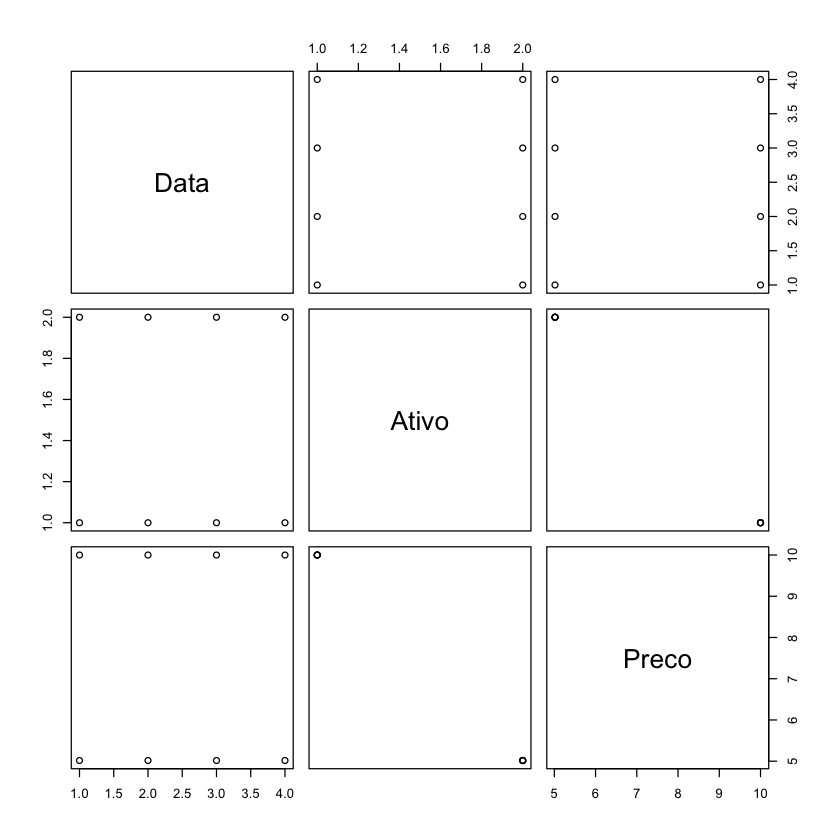

In [3]:
#pegando histórico de variação dos precos
query <- "http://api.informativos.io/prices_matrix?start_date=2018-08-13&end_date=2018-08-17&symbols[]=PETR4&symbols[]=BBDC4"
response <- content(GET(url=query), "text")

# transformando num dataframe
data <- as.data.frame(fromJSON(response, simplifyDataFrame = TRUE), stringsAsFactors=FALSE)

#colocando a primeira linha como cabecalho
normalize_data <- function(df) {
  names(df) <- as.character(unlist(df[1,]))
  df[-1,]
}
precos <- normalize_data(data)

#variacoes por dia por ativo
print(precos)

precos_aplicados <- data.frame("Data" = c(), "Ativo" = c(), "Preco" = c(), stringsAsFactors = FALSE)

# iterando sobre a carteira
for (linha_carteira in 1:nrow(carteira)) {
    ativo <- carteira[linha_carteira, "symbol"]
    preco_original <- carteira[linha_carteira, "Price"]
    #iterando sobre os precos
    for (linha_preco in 2:nrow(precos)) {
        # Aplicando na carteira
        # primeiro preco, uso o preco original da carteira
        if (linha_preco == 2)
            preco_calculado = preco_original + sapply(precos[linha_preco, ativo], as.numeric)
        
        precos_aplicados <- rbind(precos_aplicados, data.frame("Data"=precos[linha_preco, "Date"], "Ativo"=ativo, "Preco"=preco_calculado))
    }    
}

# ajustando indices do dataframe
rownames(precos_aplicados) <- 1:nrow(precos_aplicados)

precos_aplicados

precos_aplicados[order(precos_aplicados$Preco),]

#{
#     [
#         {
#             14/08: 1000.0
#         },
#         {
#             15/08: 700.0
#         }
#     ]
# }


# plot(precos_aplicados)
